In [1]:
from layers import Dense, Sigmoid, Softmax, NLL
from data import load_mnist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
(xtrain, ytrain), (xval, yval), num_cls = load_mnist()

# The way I have set up the neural net I must transofrm 1 to [1,0] and 0 to [0,1] like a one-hot
ytrain = [np.insert(np.zeros(9),y, 1) for y in ytrain]
yval = [np.insert(np.zeros(9),y, 1) for y in yval]

# Normalize
xtrain = xtrain / np.max(xtrain)

In [4]:
batch_size = 1
alpha = 0.00001

l1 = Dense(input_width=xtrain.shape[1], width=300) #weights=[[1,1,1], [-1,-1,-1]]
l2 = Sigmoid()
l3 = Dense(input_width=300, width=10) # weights=[[1,1], [-1, -1], [-1, -1]]
l4 = Softmax()
ll = NLL()

network = [l1, l2, l3,l4, ll]

log_forward = False
log_backward = False
log_update = False

In [5]:
x_train_batches=[]
y_train_batches=[]
for x in range(0,100,batch_size):
    x_train_batches.append(xtrain[x:x+batch_size])
    y_train_batches.append(ytrain[x:x+batch_size])


In [31]:
losses = []
losses_conf_int = []
for epoch in range(30):
    losses_per_item = []
    # Validate
    for idx, batch in enumerate(xval):
        X = xval[idx]
        for layer in network:
            X = layer.forward(X,y_true=yval[idx], verbose=log_forward)
        losses_conf_int.append([epoch, layer.value, 'val'])

    # Train
    for idx, batch in enumerate(xtrain[:]):
        if(log_forward):print("\nFORWARD")
        X = batch
        for layer in network:
            X = layer.forward(X,y_true=ytrain[idx], verbose=log_forward)
        losses_per_item.append(layer.value)
        losses_conf_int.append([epoch, layer.value, 'train'])

        if(log_backward):print("\n\nBACKWARD")
        context = {'y': ytrain[idx]}
        grad=None
        for layer in network[::-1]:
            grad = layer.backward(grad,context, verbose=log_backward)
        

        if(log_update):print("\nUPDATE")
        for layer in network:
            grad = layer.update(alpha, verbose=log_update)

    print('Loss:', np.mean(losses_per_item))
    losses.append(np.mean(losses_per_item))

/Users/sethvanderbijl/Coding Projects/DL@VU/Q7/layers.py:112: RuntimeWarning: overflow encountered in exp
  self.value = 1 / (1 + np.exp(-X)) # X/max to reduce overflows, but cannot just do that at sigmoid


KeyboardInterrupt: 

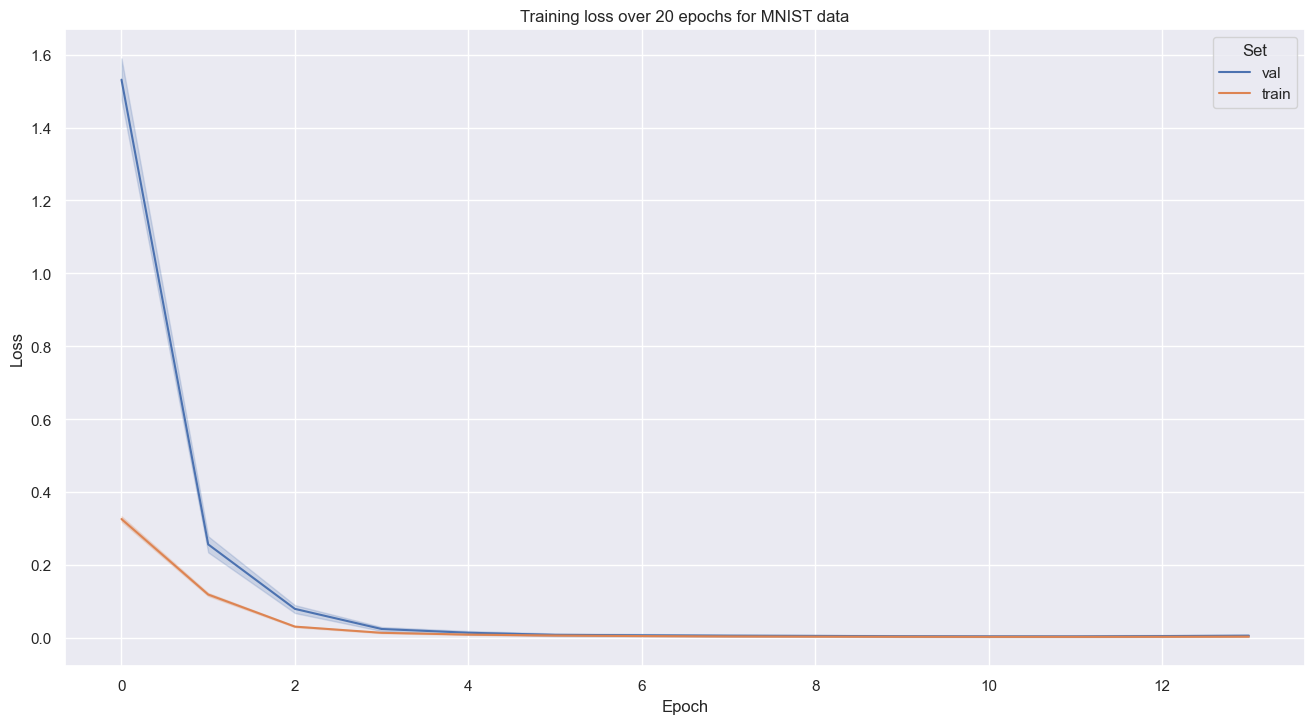

In [11]:

sns.set(rc={'figure.figsize':(16,8.27)})

s = sns.lineplot(data=pd.DataFrame(losses_conf_int, columns=['Epoch', 'Loss', 'Set']), x="Epoch", y="Loss", hue='Set')
s.set(title='Training loss over 20 epochs for MNIST data')

plt.show()

In [34]:
# 7.2
losses = []
for nn_run in range(3):
    l1 = Dense(input_width=xtrain.shape[1], width=300) #weights=[[1,1,1], [-1,-1,-1]]
    l2 = Sigmoid()
    l3 = Dense(input_width=300, width=10) # weights=[[1,1], [-1, -1], [-1, -1]]
    l4 = Softmax()
    ll = NLL()

    network = [l1, l2, l3,l4, ll]
    
    losses_conf_int = []
    for epoch in range(10):
        losses_per_item = []
        # Validate
        for idx, batch in enumerate(xval):
            X = xval[idx]
            for layer in network:
                X = layer.forward(X,y_true=yval[idx], verbose=log_forward)
            losses_conf_int.append([epoch, layer.value, 'val'])

        # Train
        for idx, batch in enumerate(xtrain[:]):
            if(log_forward):print("\nFORWARD")
            X = batch
            for layer in network:
                X = layer.forward(X,y_true=ytrain[idx], verbose=log_forward)
            losses_per_item.append(layer.value)
            losses_conf_int.append([epoch, layer.value, 'train'])

            if(log_backward):print("\n\nBACKWARD")
            context = {'y': ytrain[idx]}
            grad=None
            for layer in network[::-1]:
                grad = layer.backward(grad,context, verbose=log_backward)
            

            if(log_update):print("\nUPDATE")
            for layer in network:
                grad = layer.update(0.0001, verbose=log_update)

        print('Loss:', np.mean(losses_per_item))
        losses.append([epoch, nn_run, np.mean(losses_per_item)])

Loss: 0.07042602012628355
Loss: 0.0019594430111878145
Loss: 0.0008750674691588401
Loss: 0.0004508163129240276
Loss: 0.00020541835371605896
Loss: 5.22003816041646e-05
Loss: -5.1458659784954875e-05
Loss: -0.0001266387069633133
Loss: -0.0001830390001295873
Loss: -0.00022533668326448676
Loss: 0.07924386773952612
Loss: 0.0052123259178284385
Loss: 0.003479471845938832
Loss: 0.0028906238134174017
Loss: 0.002733942343712601
Loss: 0.002935036893536112
Loss: 0.003843292572507387
Loss: 0.010588209171269765
Loss: 0.034268614026276685
Loss: 0.0005842694671726543
Loss: 0.05141442981111492
Loss: 0.0032088840833824103
Loss: -0.0005734900968764513
Loss: -0.0006559897901614907
Loss: -0.0007004731247871373
Loss: -0.0007344827950707007
Loss: -0.0007535808815443279
Loss: -0.0007618939931459238
Loss: -0.0007647098968355065
Loss: -0.0007656434490540949


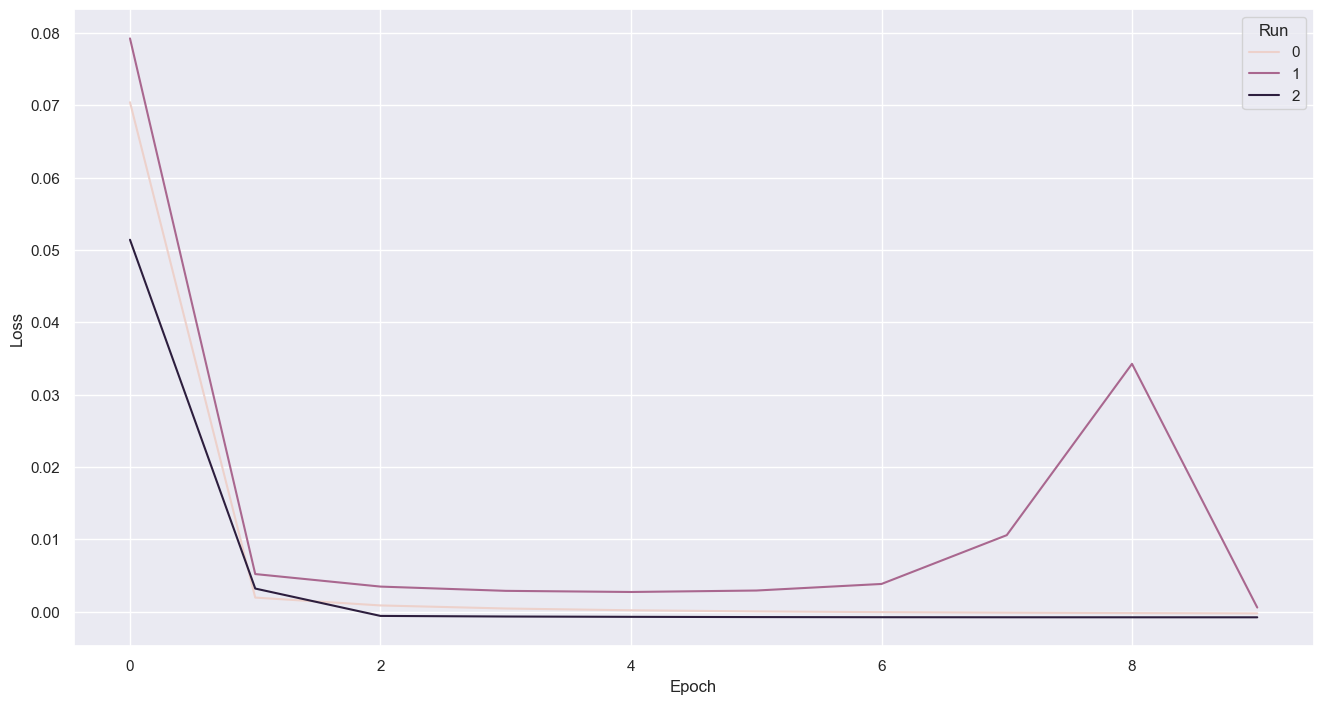

In [38]:

s = sns.lineplot(data=pd.DataFrame(losses, columns=['Epoch', 'Run', 'Loss']), x="Epoch", y="Loss", hue='Run')
# s.set(title='Training loss over 20 epochs for MNIST data')

plt.show()

In [6]:
# 7.3
losses = []
for lr in [0.001, 0.003, 0.01, 0.03]:
    l1 = Dense(input_width=xtrain.shape[1], width=300) #weights=[[1,1,1], [-1,-1,-1]]
    l2 = Sigmoid()
    l3 = Dense(input_width=300, width=10) # weights=[[1,1], [-1, -1], [-1, -1]]
    l4 = Softmax()
    ll = NLL()

    network = [l1, l2, l3,l4, ll]
    
    losses_conf_int = []
    for epoch in range(10):
        losses_per_item = []
        # Validate
        # for idx, batch in enumerate(xval):
        #     X = xval[idx]
        #     for layer in network:
        #         X = layer.forward(X,y_true=yval[idx], verbose=log_forward)
        #     losses_conf_int.append([epoch, layer.value, 'val'])

        # Train
        for idx, batch in enumerate(xtrain[:]):
            if(log_forward):print("\nFORWARD")
            X = batch
            for layer in network:
                X = layer.forward(X,y_true=ytrain[idx], verbose=log_forward)
            losses_per_item.append(layer.value)
            losses_conf_int.append([epoch, layer.value, 'train'])

            if(log_backward):print("\n\nBACKWARD")
            context = {'y': ytrain[idx]}
            grad=None
            for layer in network[::-1]:
                grad = layer.backward(grad,context, verbose=log_backward)
            

            if(log_update):print("\nUPDATE")
            for layer in network:
                grad = layer.update(lr, verbose=log_update)

        print('Loss:', np.mean(losses_per_item))
        losses.append([epoch, lr, np.mean(losses_per_item)])

Loss: 1.7746927826514296
Loss: 0.8923335704556445
Loss: 0.7209357891503531
Loss: 0.6334374616371966
Loss: 0.5770562296589872
Loss: 0.5362976415886207
Loss: 0.5047423246152439
Loss: 0.4792596800291871
Loss: 0.4580850405946906
Loss: 0.4400923238045941
Loss: 1.131952145471453
Loss: 0.5844309216375058
Loss: 0.48633869203491326
Loss: 0.4320634275236807
Loss: 0.39497708293090567
Loss: 0.36730867717979243
Loss: 0.3456984452320955
Loss: 0.32822948439215893
Loss: 0.3136945031131746
Loss: 0.3013504568719391
Loss: 0.7754551953279359
Loss: 0.41065180352087416
Loss: 0.34180129532202846
Loss: 0.30199736877301186
Loss: 0.27441129240019974
Loss: 0.2536805275561158
Loss: 0.23708098700791178
Loss: 0.22310365018465622
Loss: 0.21114941253542716
Loss: 0.2007728848117517
Loss: 0.5166655079015592
Loss: 0.2859071356015371
Loss: 0.23081877274610113
Loss: 0.19907737308239765
Loss: 0.17692081063127443
Loss: 0.1604475131330081
Loss: 0.14756003432570425
Loss: 0.13661038853065927
Loss: 0.1273450254794921
Loss: 0.11

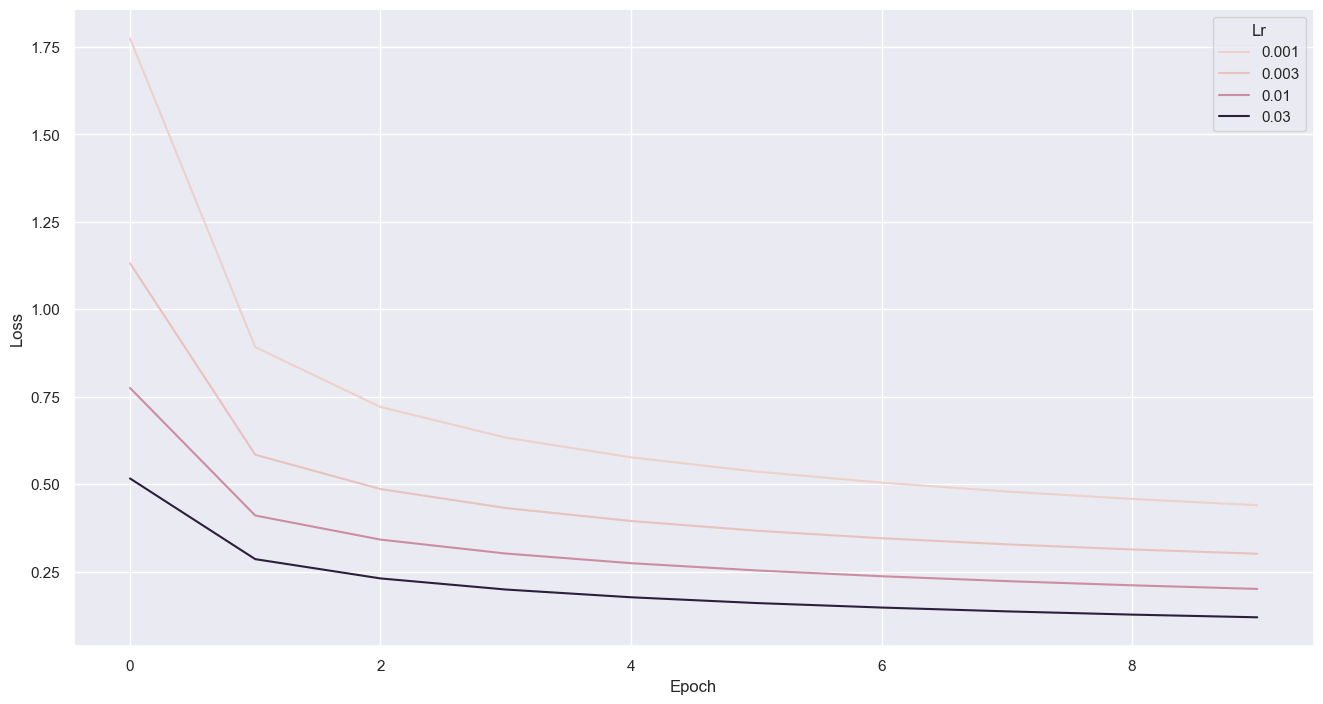

In [8]:
sns.set(rc={'figure.figsize':(16,8.27)})


s = sns.lineplot(data=pd.DataFrame(losses, columns=['Epoch', 'Lr', 'Loss']), x="Epoch", y="Loss", hue='Lr')
# s.set(title='Training loss over 20 epochs for MNIST data')

In [9]:
l1 = Dense(input_width=xtrain.shape[1], width=300) #weights=[[1,1,1], [-1,-1,-1]]
l2 = Sigmoid()
l3 = Dense(input_width=300, width=10) # weights=[[1,1], [-1, -1], [-1, -1]]
l4 = Softmax()
ll = NLL()

losses = []
losses_conf_int = []
for epoch in range(20):
    losses_per_item = []
    # Validate
    for idx, batch in enumerate(xval):
        X = xval[idx]
        for layer in network:
            X = layer.forward(X,y_true=yval[idx], verbose=log_forward)
        losses_conf_int.append([epoch, layer.value, 'val'])

    # Train
    for idx, batch in enumerate(xtrain[:]):
        if(log_forward):print("\nFORWARD")
        X = batch
        for layer in network:
            X = layer.forward(X,y_true=ytrain[idx], verbose=log_forward)
        losses_per_item.append(layer.value)
        losses_conf_int.append([epoch, layer.value, 'train'])

        if(log_backward):print("\n\nBACKWARD")
        context = {'y': ytrain[idx]}
        grad=None
        for layer in network[::-1]:
            grad = layer.backward(grad,context, verbose=log_backward)
        

        if(log_update):print("\nUPDATE")
        for layer in network:
            grad = layer.update(0.03, verbose=log_update)

    print('Loss:', np.mean(losses_per_item))
    losses.append(np.mean(losses_per_item))

/Users/sethvanderbijl/Coding Projects/DL@VU/Q7/layers.py:87: RuntimeWarning: overflow encountered in exp
  self.value = 1 / (1 + np.exp(-X))


Loss: 0.11307704314523653
Loss: 0.10730724613047456
Loss: 0.10217185796767252
Loss: 0.09751179725886563
Loss: 0.09324116215236439
Loss: 0.08924314104131645
Loss: 0.08539162310501328
Loss: 0.08181030227601394
Loss: 0.07849909573713534
Loss: 0.07551566659793754
Loss: 0.07268433179349888
Loss: 0.06993823186756777
Loss: 0.06735200671136611
Loss: 0.06491019962225227
Loss: 0.06258340357861912
Loss: 0.060353389254752345
Loss: 0.05824348218486008
Loss: 0.056330429869737145
Loss: 0.05452490105492054
Loss: 0.05280117806146748
Loss: 0.05116056599803118
Loss: 0.04959806592816565
Loss: 0.04811560497727607
Loss: 0.04674498797688974
Loss: 0.04537954414907033
Loss: 0.044027548942325946
Loss: 0.04272077430401903
Loss: 0.041500556140331435
Loss: 0.04036021990879682
Loss: 0.03927541329889363
Loss: 0.03823991083960412
Loss: 0.03724527855304698
Loss: 0.036293494593494534
Loss: 0.035366968901333
Loss: 0.03447411405844693
Loss: 0.0336330006995786
Loss: 0.03275212572059634
Loss: 0.0318917161242349
Loss: 0.031

In [11]:
(xtrain, ytrain), (xtest, ytest), num_cls = load_mnist(True)

# The way I have set up the neural net I must transofrm 1 to [1,0] and 0 to [0,1] like a one-hot
ytrain = [np.insert(np.zeros(9),y, 1) for y in ytrain]
ytest = [np.insert(np.zeros(9),y, 1) for y in ytest]

# Normalize
xtrain = xtrain / np.max(xtrain)

In [12]:
for idx, batch in enumerate(xtest):
    X = xtest[idx]
    for layer in network:
        X = layer.forward(X,y_true=ytest[idx], verbose=log_forward)
    losses.append(layer.value)

np.mean(losses)

/Users/sethvanderbijl/Coding Projects/DL@VU/Q7/layers.py:87: RuntimeWarning: overflow encountered in exp
  self.value = 1 / (1 + np.exp(-X))


0.32028061330594554